# * ECOMMERCE CUSTOMER CHURN *

BY ADHITIA SEPTIAN 

- Business Problem
- Data Understanding
- Data Cleaning
- Data Analysis
- Data Preprocessing and Feature Engineering
- Modeling
- Conclusion and Recommendation

## BUSINESS PROBLEM

### Latar Belakang
Customer churn atau tingkat keluar pelanggan adalah salah satu indikator kunci dari kesuksesan bisnis ecommerce. Tingkat keluar pelanggan yang tinggi dapat mengakibatkan kerugian finansial yang signifikan dan mengurangi citra merek.

Sebuah ecommerce customer churn bertujuan untuk menganalisis perilaku pelanggan dan mengidentifikasi faktor-faktor yang menyebabkan mereka meninggalkan layanan atau toko online. Berikut adalah beberapa langkah yang dapat Anda ikuti dalam menjalankan proyek ecommerce customer churn.

### Siapa saja yang mengalami Customer Churn

Semua pelaku bisnis ecommerce

### Problem Statement
Pelanggan meninggalkan atau menghentikan hubungan mereka dengan bisnis ecommerce, yang mengakibatkan hilangnya pendapatan dan pada akhirnya menurunnya pertumbuhan bisnis. 
Faktor yang berkontribusi terhadap keputusan pelanggan untuk meninggalkan adalah pelayanan pelanggan yang buruk, kualitas produk yang rendah, harga yang tinggi, opsi pengiriman yang tidak nyaman atau tidak dapat diandalkan, dan persaingan dari bisnis ecommerce lainnya.

### Goals

Untuk meningkatkan retensi pelanggan dan mengurangi kehilangan pelanggan dalam bisnis ecommerce, sehingga bisnis dapat tumbuh dan berkembang dengan baik dalam jangka panjang. Dan juga untuk memahami penyebab churn atau kehilangan pelanggan dalam bisnis ecommerce dan menemukan cara untuk mengurangi tingkat churn tersebut.

##### Analytic Approach

Pendekatan analitik yang dilakukan berupa pembuatan, evaluasi, dan implementasi model machine learning klasifikasi yang dapat memprediksi apabila pelanggan akan *churn* atau tidak berdasarkan riwayat data sebelumnya. 

##### Metric Evaluation
|       | N-Prediction| P-Prediction |
| --- | --- | --- |
| **N-Actual**     | True Positive | False Positive |
| **P-Actual**      | False Negative | True Positive |

Target :  
0 : Pelanggan tidak Churn  
1 : Pelanggan Churn

Type 1 error : False Positive  
Konsekuensi: Biaya penawaran khusus yang dikeluarkan oleh perusahaan menjadi sia-sia.

Type 2 error : False Negative  
Konsekuensi: Pelanggan melakukan Churn dan tidak lagi menggunakan layanan perusahaan.

Berdasarkan konsekuensinya, langkah yang tepat untuk pemilihan model adalah model yang mengurangi hilangnya pelanggan loyal, tetapi tetap memperhatikan pengeluaran biaya pemasaran untuk pelanggan yang kurang tepat. Recall dan precision yang diseimbangkan dari kelas positif (Pelanggan *churn*). Metrik yang akan digunakan adalah F1 Score. 

## Data Understanding


Dataset dibuat oleh Perusahaan E-commerce terkemuka pada tahun 2020. Perusahaan bertujuan untuk mengetahui pelanggan mana yang akan *churn*, sehingga dilakukan pendekatan berupa promo terhadap kelompok pelanggan tersebut. Dataset berisikan profil dan riwayat transaksi pelanggan.

In [66]:
# Library

import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Feature Engineering Library
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


# Model Selection Library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC
import shap 
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Addition
import pickle
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from textwrap import wrap

# Set max columns
pd.set_option('display.max_columns', 500)

#### Import Dataset

In [67]:
# import dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


| Attribute | Data Type | Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float | Masa tenure pelanggan | Quant. Kontinu |
| Warehouse to Home | Float | Jarak antara warehouse ke rumah pelanggan | Quant. Kontinu |
| Number of Device | Int | Jumlah perangkat yang terdaftar | Quant. Diskrit |
| Prefered Order Cat | Object | Kategori disukai pelanggan bulan lalu| Qual. (Nominal) |
| Satisfaction Score | Int | Skor kepuasan pelanggan | Qual. (Ordinal) |
| Marital | Object | Status pernikahan pelanggan | Qual. (Nominal) |
| Number of Address | Int | Jumlah alamat yang terdaftar | Quant. Diskrit |  
| Complain | Int | 0 - Tidak Ada complain, 1 - ada complain | Qual. (Nominal)|
| Day Since Last Order | Float | Hari sejak pemesanan terakhir | Quant. Kontinu |
| Cashback Amount | Float | Rata-rata cashback bulan lalu | Quant. Kontinu |
| Churn | Int | 0 - Tidak *churn* , 1 - *Churn* | Qual. (Nominal) | 

In [68]:
# menghitung jumlah baris dan kolom
df.shape

(3941, 11)

In [69]:
# data tipe dan menghitung jumlah dari kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Dari data diatas dapat diketahui beberapa hal:  
* Terdapat 3941 baris dan 11 kolom pada dataset
* Data numerik dengan variabel quantitave antara lain Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, dan Cashback Amount. Data numerik yang menunjukkan yes or no atau bersifat qualitative adalah complain, dan churn. Data numerik yang menunjukkan qualitative dengan scale ordinal adalah satisfaction score. Data kategorik ada dua antara lain Prefered Order Cat dan Marital. 
* Dari info dataset terlihat ada beberapa missing value, yang akan ditindak-lanjuti di data cleaning

Kolom Complain    
0 : No Complain  
1 : Complain  


Kolom Churn  
0 : No Churn  
1 : Churn  

## Data Cleaning

#### Data Duplikat
Pertama kita ingin mengetahui data unik masing-masing fitur, dan mengetahui apabila ada duplikat atau typo pada dataset. 

In [70]:
# melihat isi baris dari setiap kolom

pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelinfo = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelinfo

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [71]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          887 
Fashion               585 
Mobile                559 
Grocery               273 
Others                179 
Name: PreferedOrderCat, dtype: int64

Terdapat 2 kategori yang sama yaitu 'Mobile' dan 'Mobile Phone', sehingga semua baris dengan kategori 'Mobile' pada kolom tersebut akan diganti menjadi 'Mobile Phone'

In [72]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion               585 
Grocery               273 
Others                179 
Name: PreferedOrderCat, dtype: int64

### Checking duplicated data

In [73]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [74]:
# Melihat Jumlah Data Duplikat
Duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 data duplikat dari 3941 baris dengan persentase 17,05%. Karena pada dataset **tidak adanya Customer ID** data dianggap benar-benar duplikat. Langkah yang dilakukan untuk menangani data duplikat adalah menghapus baris duplikat. Data duplikat harus dihapus karena dapat mempengaruhi performa model machine learning yang dibuat. hasil evaluasi data test bisa menjadi bias karena adanya information leakage dari data yang ditraining.

In [75]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### Check Missing Values


In [76]:
# Melihat total missing value dari setial kolom
df.isnull().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered    0  
PreferedOrderCat            0  
SatisfactionScore           0  
MaritalStatus               0  
NumberOfAddress             0  
Complain                    0  
DaySinceLastOrder           181
CashbackAmount              0  
Churn                       0  
dtype: int64

In [77]:
# Melihat persentase missing value dari setiap kolom
for col in df.columns:
    prct = np.mean(df[col].isnull())
    print('{}: {}%'.format(col, round(prct*100)))

Tenure: 5%
WarehouseToHome: 4%
NumberOfDeviceRegistered: 0%
PreferedOrderCat: 0%
SatisfactionScore: 0%
MaritalStatus: 0%
NumberOfAddress: 0%
Complain: 0%
DaySinceLastOrder: 6%
CashbackAmount: 0%
Churn: 0%


terdapat missing values sebesar 14% di beberapa kolom yaitu :
1. Tenure sebanyak 5%
2. WarehouseToHome sebanyak 4%, dan
3. DaySinceLastOrder sebanyak 5%

Karena jumlah missing value cukup besar yaitu 14,53%, baris yang berisi missing value tidak akan didrop karena dapat mengurangi jumlah data dan informasi yang diketahui. Semua missing value diatas merupakan data numerik dalam tipe float dengan jenis kontinu. Missing value akan dianalisa lebih lanjut

### Cek tipe data Kolom yang terdapat missing Value


In [78]:
df[['Tenure','WarehouseToHome','DaySinceLastOrder']].dtypes

Tenure               float64
WarehouseToHome      float64
DaySinceLastOrder    float64
dtype: object

Dari hasil diatas, kolom yang memiliki missing value hanya pada tipe data float atau numerikal

Sebelum memutuskan metode yang digunakan untuk mengisi missing value, perlu di cek terlebih dahulu outlier pada masing-masing kolom

In [79]:
dfMissVal = df[['Tenure','WarehouseToHome','DaySinceLastOrder']]

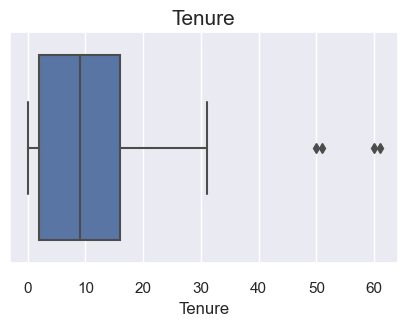

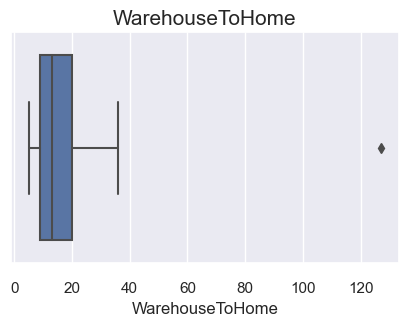

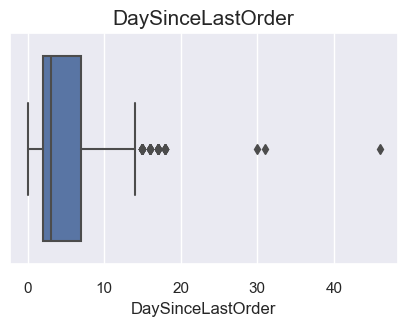

In [80]:
# Creating Box Plot
for column in dfMissVal:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[column])
    plt.title(column, size=15)
    plt.show()

dari 3 Kolom Missing value diatas kita dapat melihat outliers, hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya.   
selanjutnya kita perlu mengercek nilai mean dan median dari masing masing kolom

In [81]:
df[['Tenure','WarehouseToHome','DaySinceLastOrder']].describe()

,Tenure,WarehouseToHome,DaySinceLastOrder
count,3110.000000,3134.000000,3088.000000
mean,10.190354,15.510849,4.546956
std,8.650821,8.569707,3.695715
min,0.000000,5.000000,0.000000
25%,2.000000,9.000000,2.000000
50%,9.000000,13.000000,3.000000
75%,16.000000,20.000000,7.000000
max,61.000000,127.000000,46.000000




dari penjelasan diatas terlihat ketiga kolom memiliki outlier, maka ketiga kolom tersebut nantinya kita akan kita isi dengan simple imputer(mean) dalam pipeline sebagai pengisi missing value nya

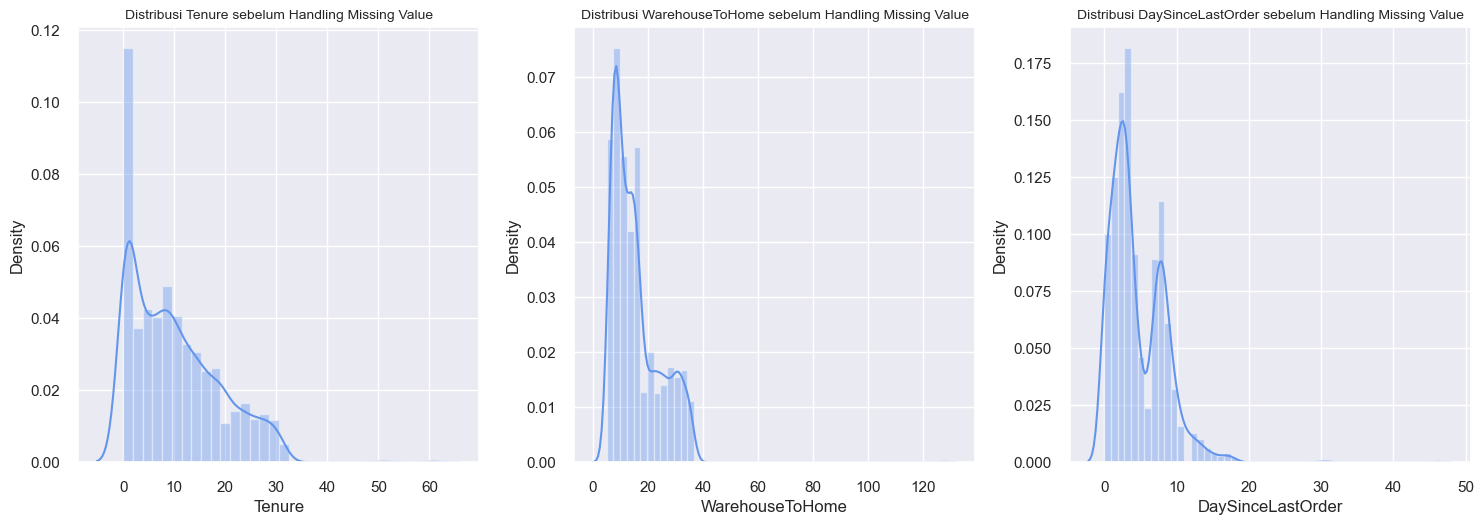

In [82]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]], color='cornflowerblue')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

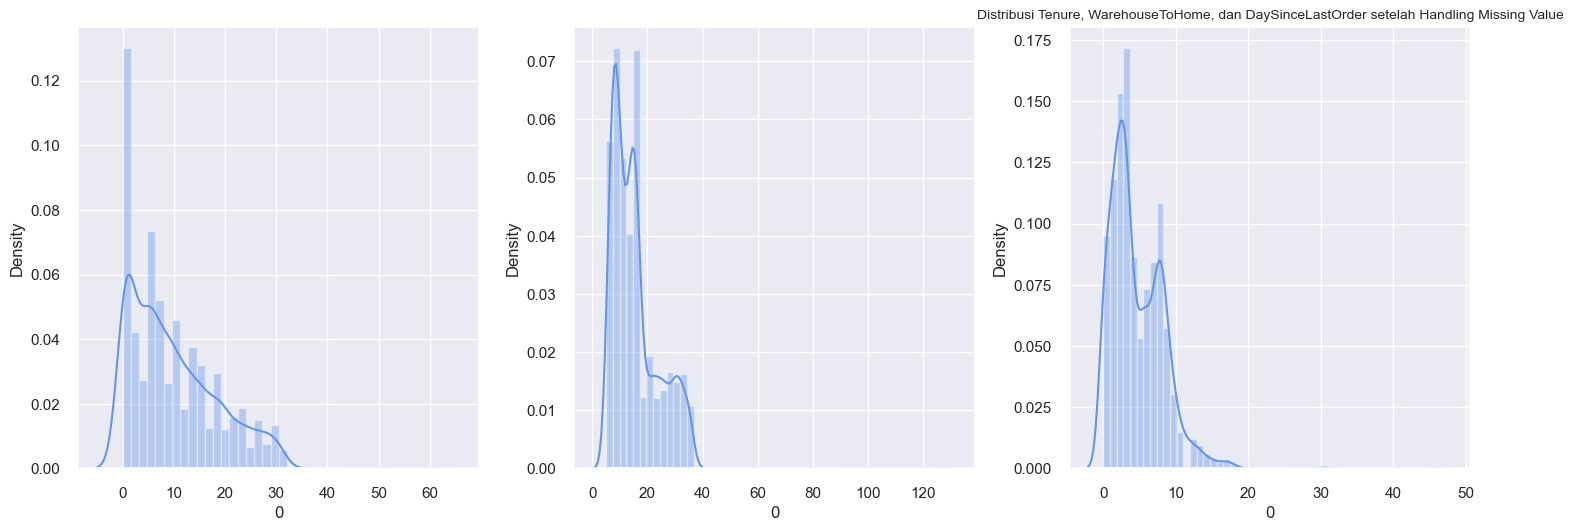

In [83]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0], color='cornflowerblue')
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

## Data Analysis

Setelah dilakukan proses data cleaning, akan dilakukan analisa untuk memahami karakteristik pelanggan yang churn. Akan dilihat proporsi pelanggan yang tidak churn dan pelanggan yang churn. 

Pelanggan Churn

In [84]:
# Perbandingan pelanggan tidak churn dan churn
df['Churn'].value_counts()

0    2736
1    533 
Name: Churn, dtype: int64

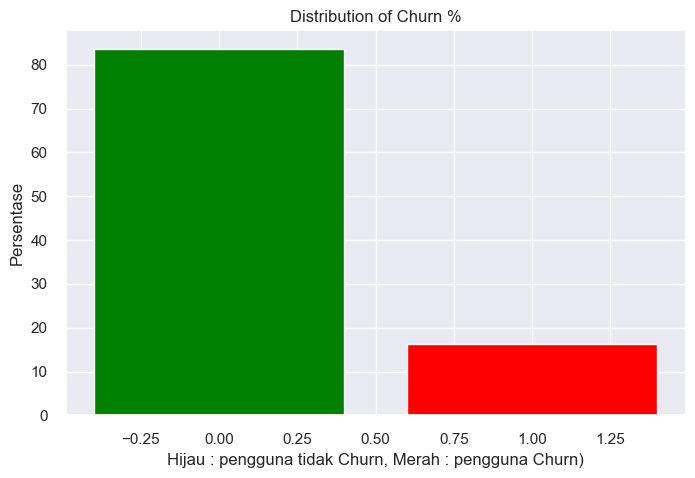

In [85]:
# Menampilkan barplot dari Churn
fig, axes = plt.subplots(figsize=(8,5))
data = df["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Persentase')
axes.set_xlabel('Hijau : pengguna tidak Churn, Merah : pengguna Churn)')
plt.show()

Dari data diatas dapat dilihat bahwa dataset merupakan data imbalance karena kelas timpang, dengan proporsi tidak churn 83,67% dan proporsi churn 16.33%. Data imbalance dapat memiliki dampak buruk pada model machine learning yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas. Sehingga akan dilakukan metode resampling SMOTE atau Synthetic Minority Oversampling Technique, yaitu menambah kelas minoritas yang akan dilakukan pada saat modeling.   

#### Nilai Kategorikal

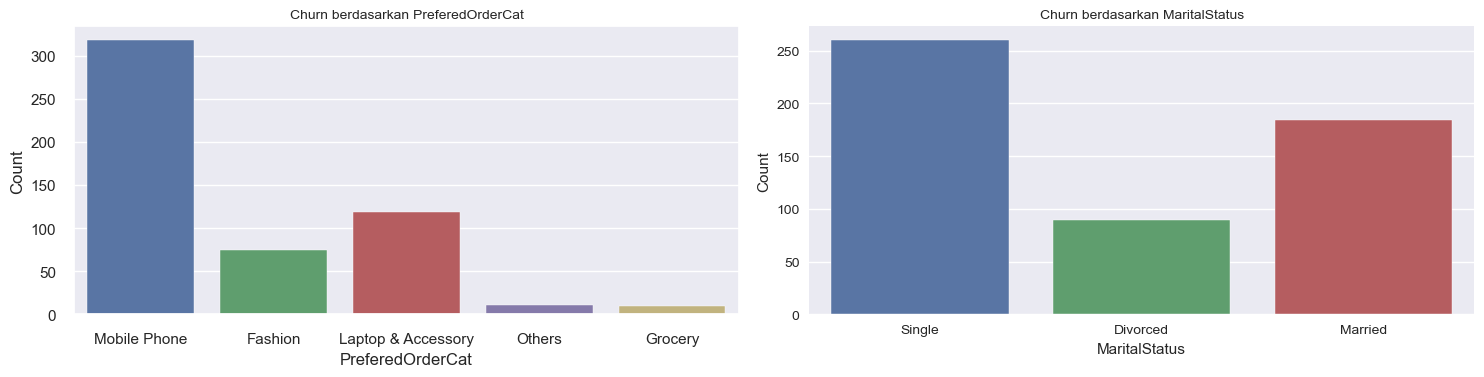

In [86]:
# Karakteristik churn berdasarkan kategori
kat = ['PreferedOrderCat', 'MaritalStatus']
plt.figure(figsize=(15,7))
a=1
for i in kat:  
    plt.subplot(2,2,a)
    plt.style.use('seaborn')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

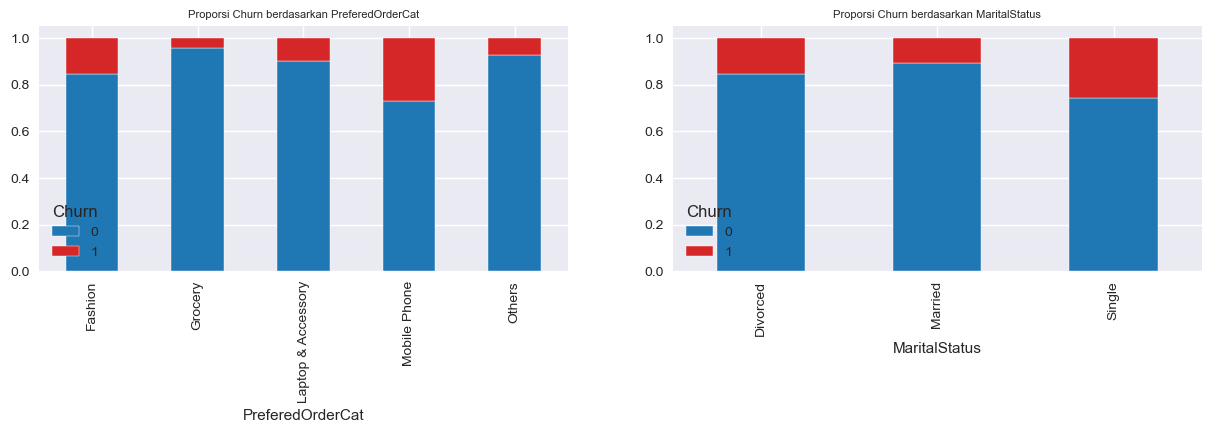

In [87]:
# Visualisasi proporsi churn berdasarkan variabel
a=1
plt.figure(figsize=(15,7))
for i in kat: 
    ax = plt.subplot(2,2,a)
    plt.style.use('seaborn')
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

Dari data diatas dapat dilihat bahwa jumlah dan proporsi pelanggan yang churn cenderung memiliki preferensi order Mobile Phone dan memiliki status single.

### Nilai Kontinus

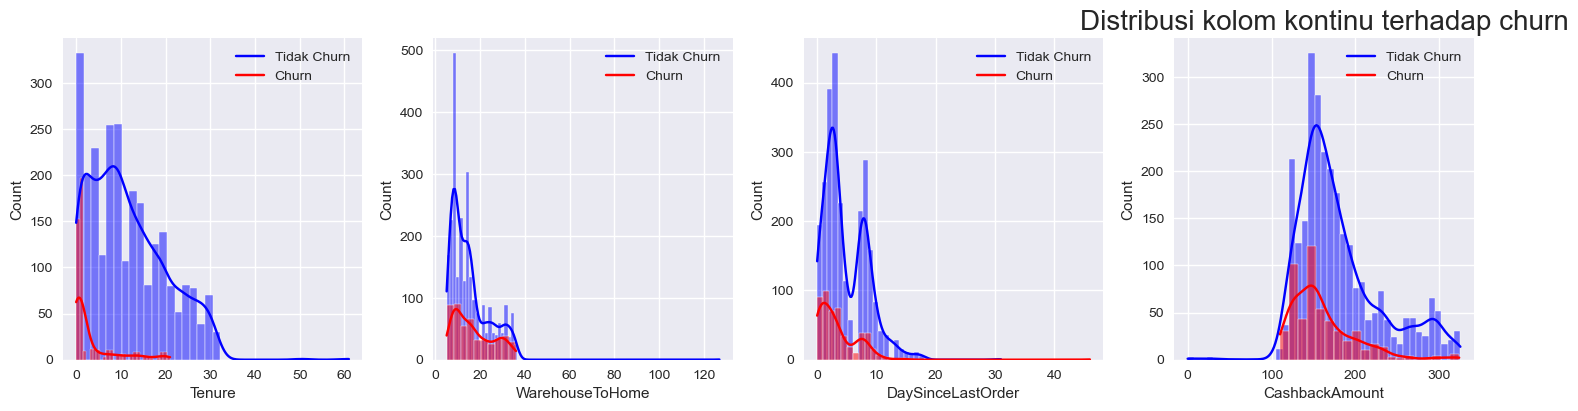

In [88]:
# Distribusi pada kolom kontinu terhadap churn
kontinu= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))
for i in kontinu:
    plt.subplot(4,4,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.title('Distribusi kolom kontinu terhadap churn', fontsize=20)
plt.show()

Pada grafik distribusi kontinu diatas terhadap churn, karena proporsi tidak churn memang lebih besar dari churn, sehingga didapat beberapa insight, antara lain:
* Tenure merupakan masa penggunaan platform e-commerce dari pertama mendaftar dalam satuan bulan, semakin kecil bulan penggunaan platform, maka semakin besar pelanggan churn. Terdapat juga fluktuasi pelanggan tidak churn pada bulan 8-11, yang menunjukkan rate pelanggan loyal semakin tinggi di range bulan tersebut.
* WarehouseToHome merupakan jarak antara gudang dengan rumah pelanggan, data pelanggan churn terdistribusi hampir rata. Tetapi selisih pelanggan churn dan tidak churn diatas 20KM sangat kecil, sehingga dapat disimpulkan semakin jauh jarak gudang dengan rumah pelanggan, maka ada kemungkinan pelanggan churn dibanding tidak churn. 
* DaySinceLastOrder pada pelanggan churn dan tidak churn menunjukkan distribusi yang hampir sama. Akan dianalisa lebih lanjut untuk korelasi data daysincelastorder dan churn. 
* CashbackAmount pelanggan churn paling tinggi berada di sekitar 150, dan akan dianalisa lebih lanjut faktornya. 

Selain distribusinya terhadap tidak churn dan churn, akan dilihat distribusi rata-rata pelanggan churn berdasarkan masing-masing variabel.

### Korelasi Data

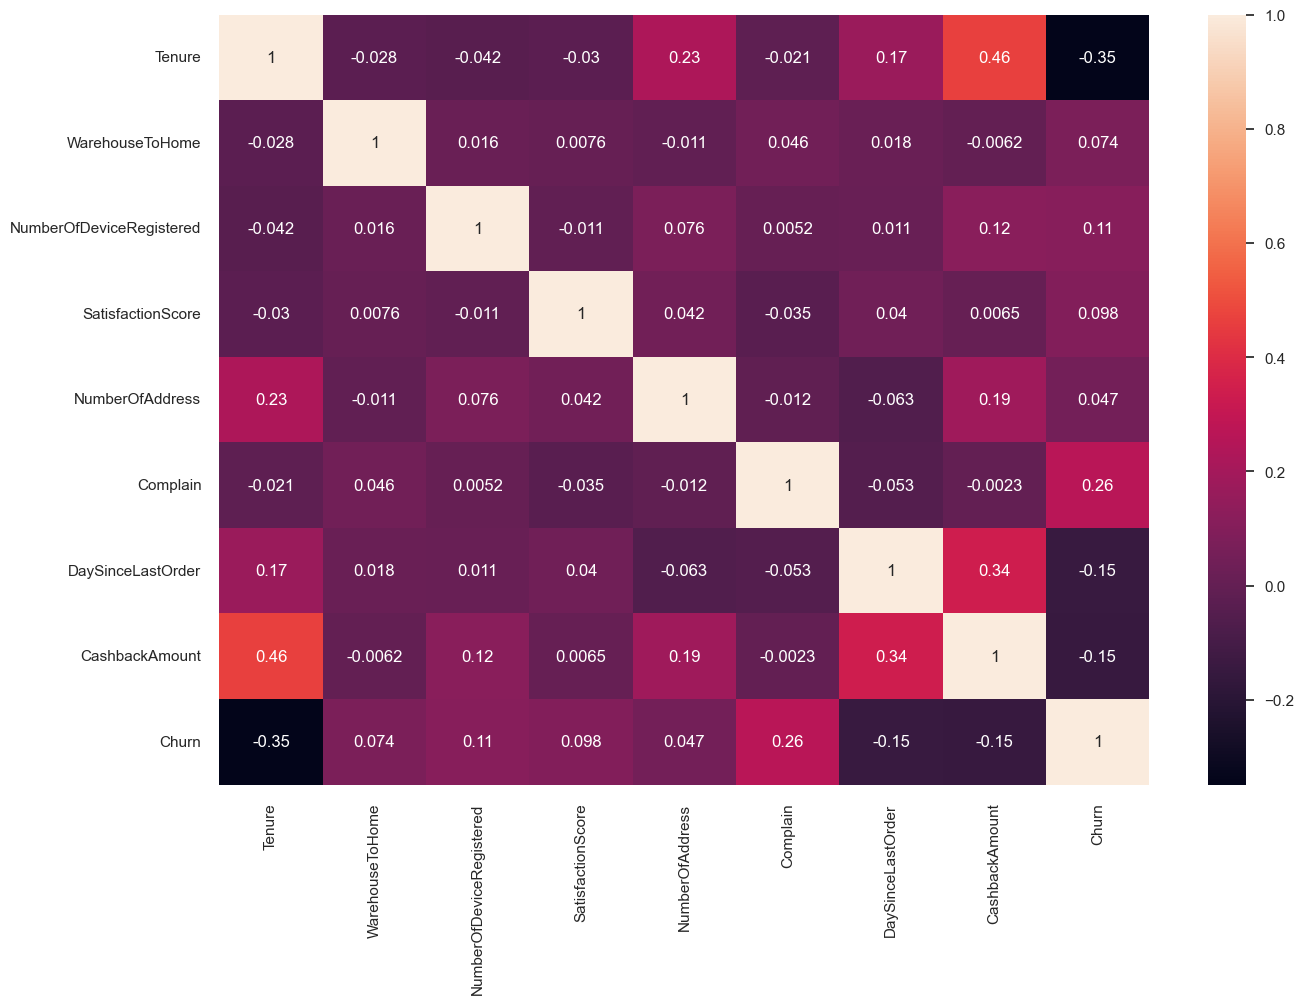

In [89]:
# Korelasi antar kolom
sns.set(rc={'figure.figsize':(15,10)})
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

dari Heatmap diatas bisa di jelaskan korelasi yang tinggi antara CashBackAmount dan Tenure dapat diartikan bahwa semakin lama seorang pelanggan menggunakan layanan atau produk, semakin banyak cashback yang akan mereka dapatkan

In [90]:
df[['CashbackAmount','Tenure']]

,CashbackAmount,Tenure
0,143.32,15.0
1,129.29,7.0
2,168.54,27.0
3,230.27,20.0
4,322.17,30.0
...,...,...
3933,249.90,25.0
3935,295.99,26.0
3936,231.86,28.0
3937,157.80,8.0


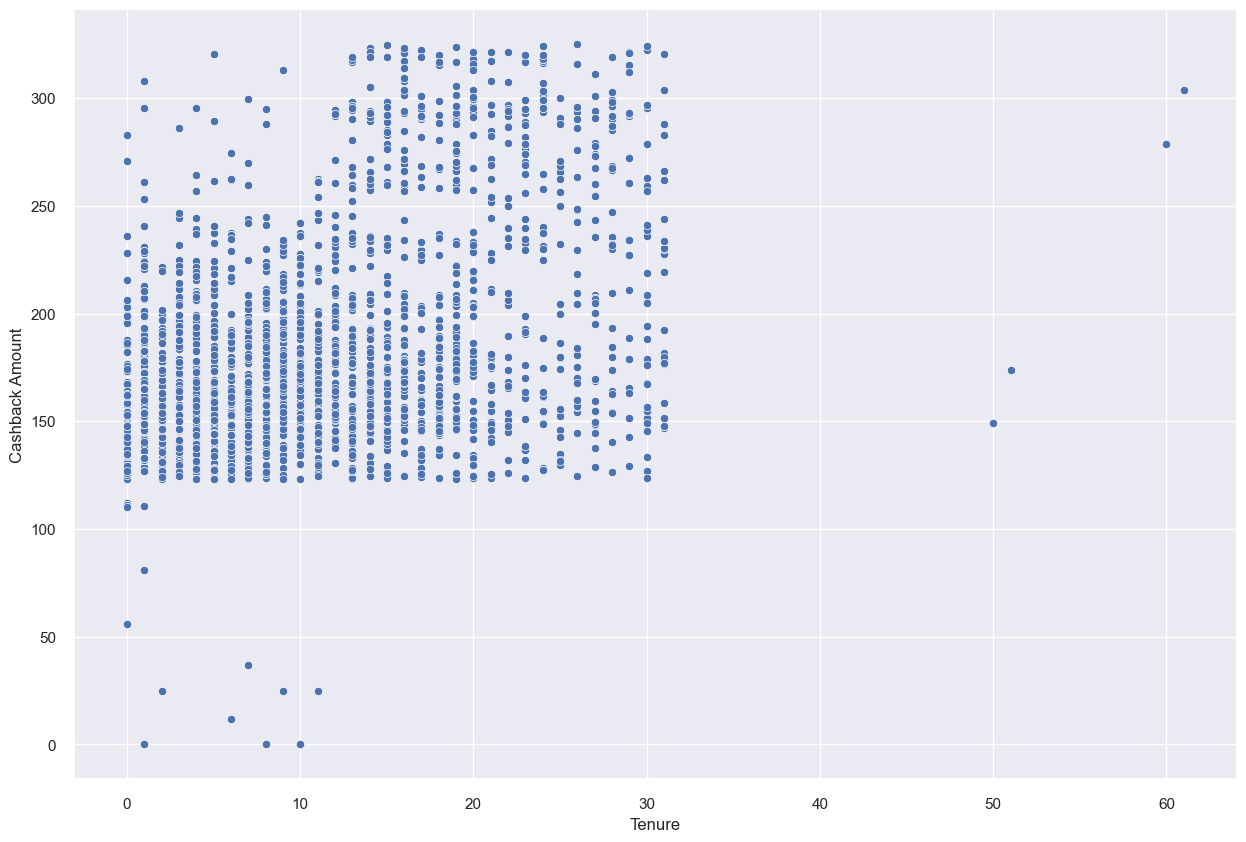

In [91]:
# membuat plot
sns.scatterplot(df['Tenure'], df['CashbackAmount'])

# menambahkan label pada sumbu x dan y
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# menampilkan plot
plt.show()

dari grafik scatterplot dapat terlihat bahwa pengguna banyak mendapat CashbackAmount pada Tenure 0-30 dengan rentang CashBackAmount sekitar 100-300

##### melihat unique values dari kolom tipe object

In [92]:
#This function will search and print for all the unique values in each column.
def print_unique_col_values(dataframe):
       for column in dataframe:
            if dataframe[column].dtypes=='object':
                print(f'{column}: {dataframe[column].unique()}')

In [93]:
print_unique_col_values(df)

PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']
MaritalStatus: ['Single' 'Married' 'Divorced']


#### Cek berdasarkan MaritalStatus

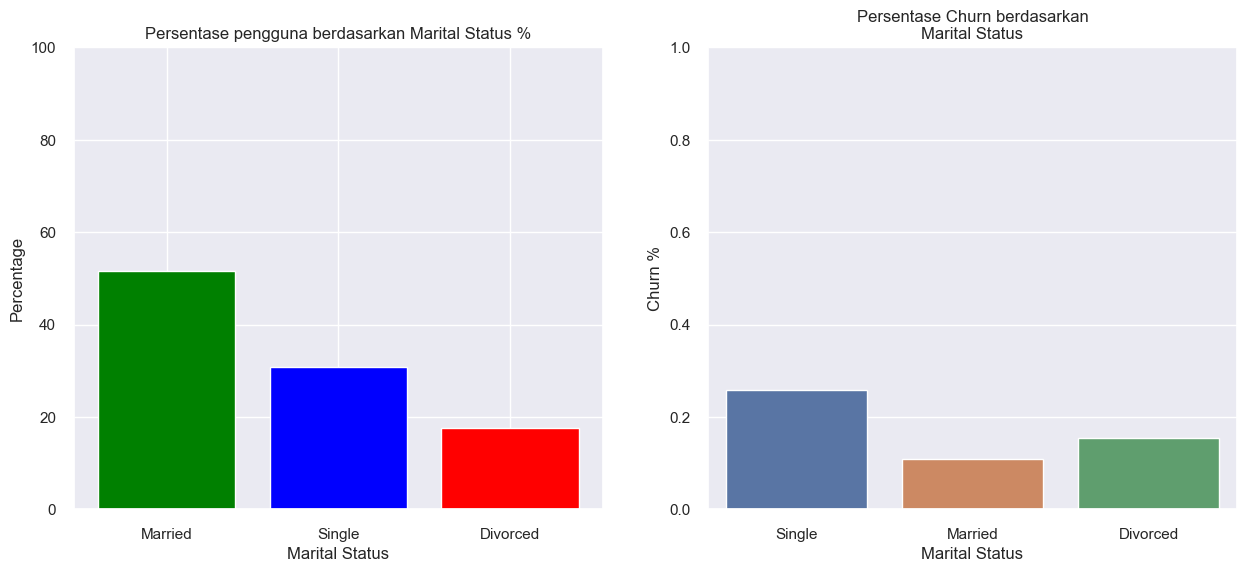

In [94]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of marital status
data = df["MaritalStatus"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue', 'red'])
axes1.set_title('Persentase pengguna berdasarkan Marital Status %')
axes1.set_xlabel('Marital Status')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Marital Status
sns.barplot(x="MaritalStatus", y="Churn", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Marital Status')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('Persentase Churn berdasarkan Marital Status', 30)))
axes2.set_ylim(0,1)

plt.show()

Bisa dilihat dari Barplot diatas bahwa :
- Pengguna paling banyak adalah yang berstatus menikah sekitar 50 %
- Pengguna yang berstatus Single memiliki persentase Churn paling banyak sekitar 30 %

#### Check Berdasarkan kolom Tenure

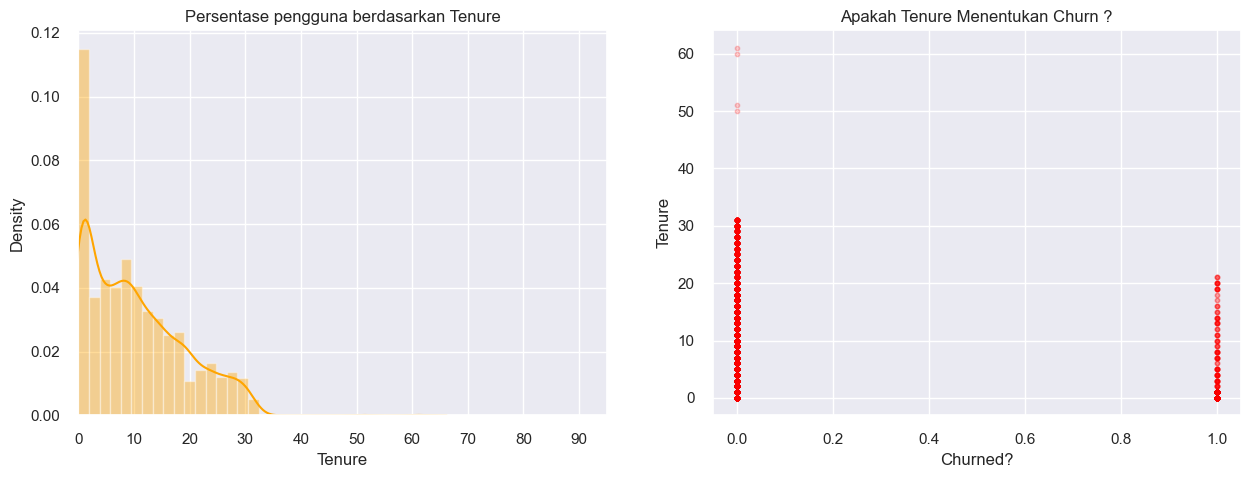

In [95]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure
sns.distplot(df.Tenure, color='orange', ax=axes1)
axes1.set_title('Persentase pengguna berdasarkan Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(df.Churn, df.Tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Apakah Tenure Menentukan Churn ?')

plt.show()

dalam grafik diatas bisa dijelaskan bahwa :

- Mayoritas pengguna memiliki umur Tenure yang pendek. Jadi, Pengguna kemungkinan churn dalam waktu kurang dari 1 tahun atau hanya pengguna baru.
- Dalam diagram sebelah kanan, memperlihatkan bahwa semakin lama Tenur, maka kemungkinan untuk Churn berkurang

#### Check berdasarkan Kolom Satisfaction Score

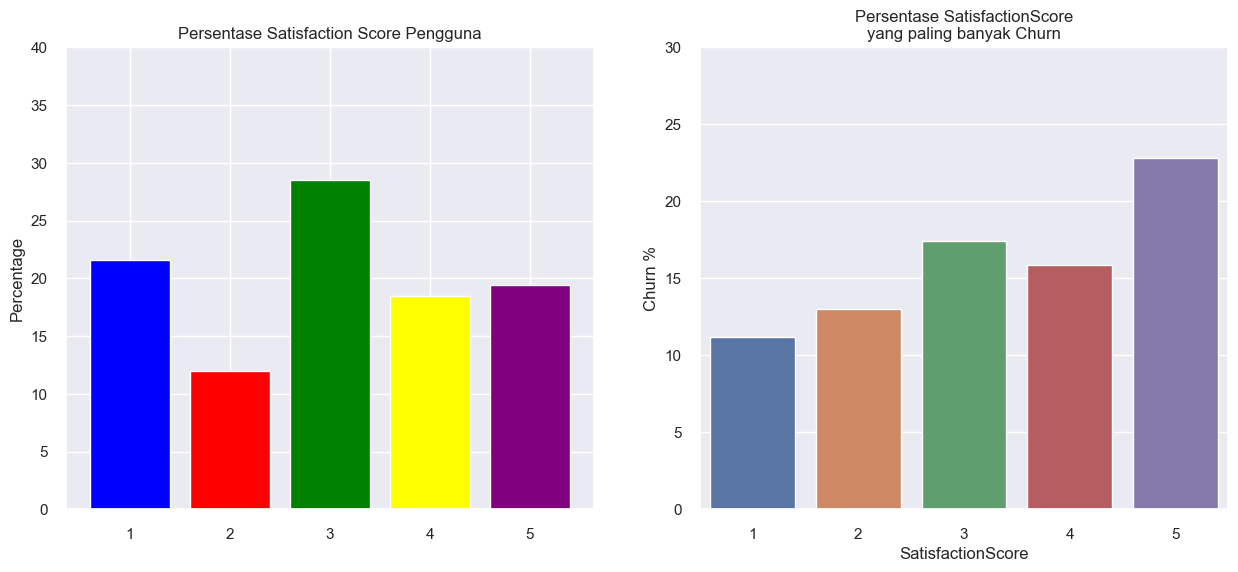

In [96]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Satisfaction Score
data = df["SatisfactionScore"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue','purple','yellow','red'])
axes1.set_title('Persentase Satisfaction Score Pengguna')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,40)

# Chances of churn based on Satisfaction Score
sns.barplot(x="SatisfactionScore", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('Persentase SatisfactionScore yang paling banyak Churn', 30)))
axes2.set_ylim(0,30)

plt.show()

Berdasarkan Grafik diatas bisa dijelaskan bahwa :
- Satisfaction Level 3 paling dominan dalam pengguna sekitar 30 %
- Satisfaciton Score level 5 paling banyak mengalami Churn sekitar 25%

#### Check berdasarkan kolom Complain

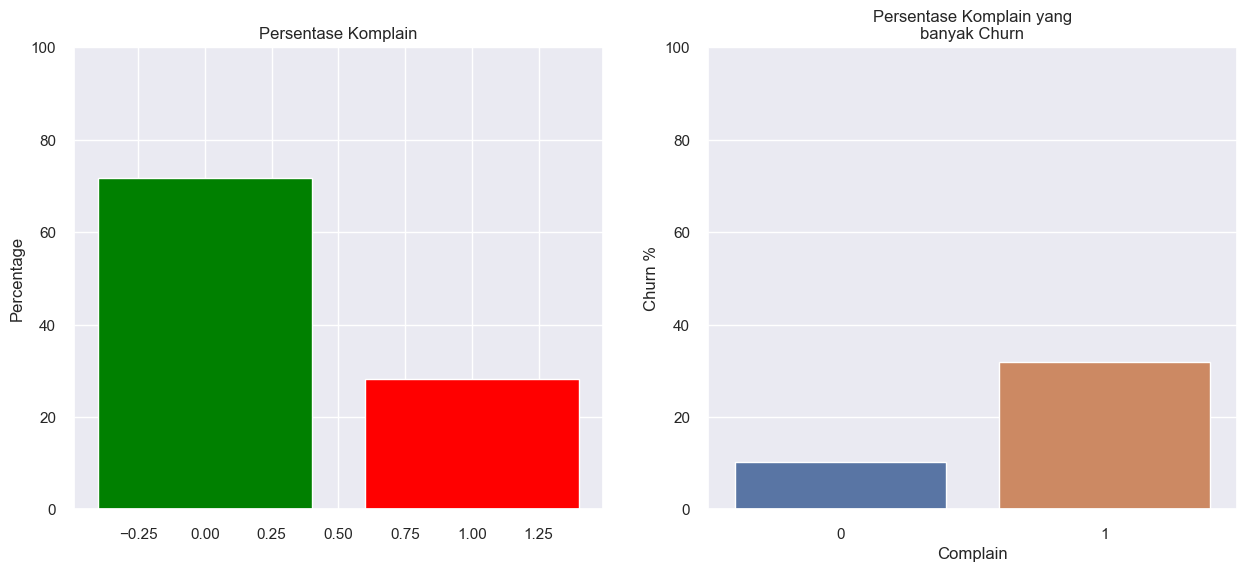

In [97]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Complain
data = df["Complain"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Persentase Komplain')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Complain
sns.barplot(x="Complain", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('Persentase Komplain yang banyak Churn', 30)))
axes2.set_ylim(0,100)

plt.show()

Berdasarkan grafik diatas bisa dijelaskan bahwa :
- Persentase Complain masih dibawah persentase tidak komplain sebesar sekitar 30%
- Persentase pelanggan yang complain memiliki lebih banyak Churn yaitu sebesar hampir 40%

#### Check berdasarkan kolom Warehouse to Home

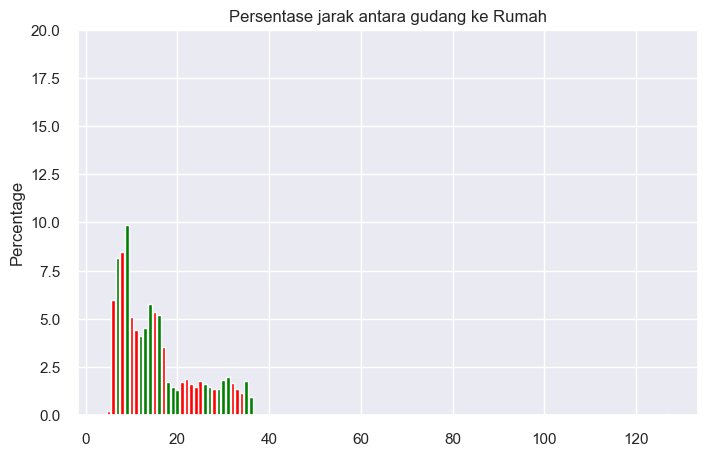

In [98]:
fig, axes1 = plt.subplots(figsize=(8,5))
# Plot distribution of Warehouse To Home
data = df["WarehouseToHome"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Persentase jarak antara gudang ke Rumah')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

plt.show()

dari grafik diatas bisa di jelaskan bahwa semakin jauh jarak pengguna ecommerce semakin sedikit pengguna, pengguna paling banyak terdapat pada jarak dibawah 20KM.

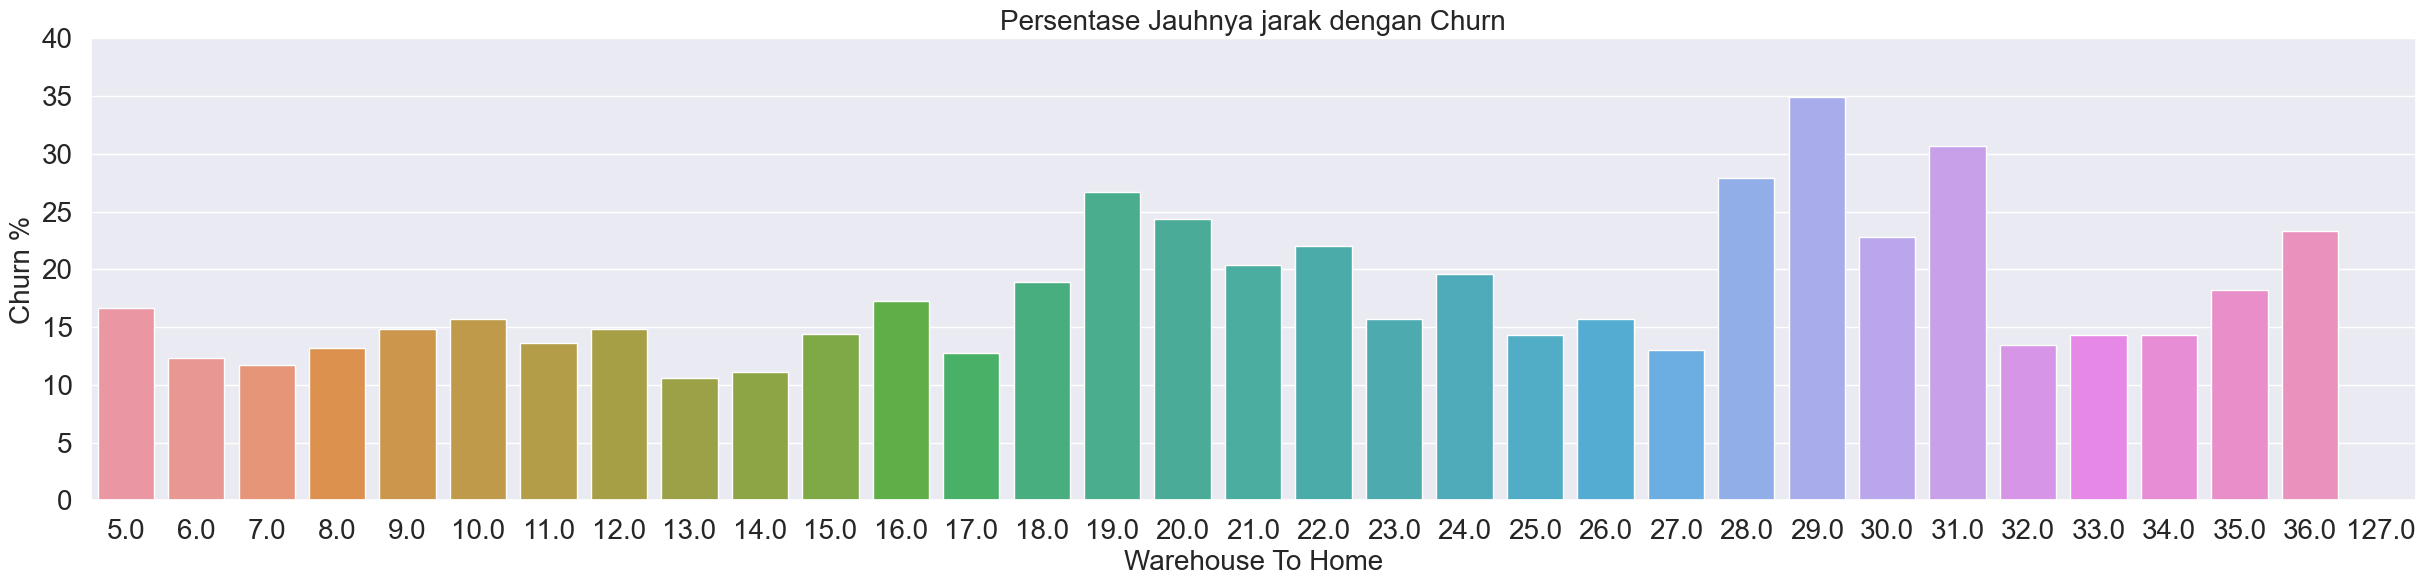

In [99]:
# Chances of churn based on WarehouseToHome
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x='WarehouseToHome', y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_xlabel('Warehouse To Home', fontsize = 20)
axes2.set_title("Persentase Jauhnya jarak dengan Churn", fontsize = 20)
axes2.set_ylim(0,40)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

Bisa dilihat grafik diatas bahwa :
- terjadi persentasi Churn pada jarak Warehouse ke rumah pada range 15-31KM, ini menandakan semakin jauh jarak rumah dari gudang semakin besar potensi churn nya

#### Check berdasarkan kolom Day Since Last Order

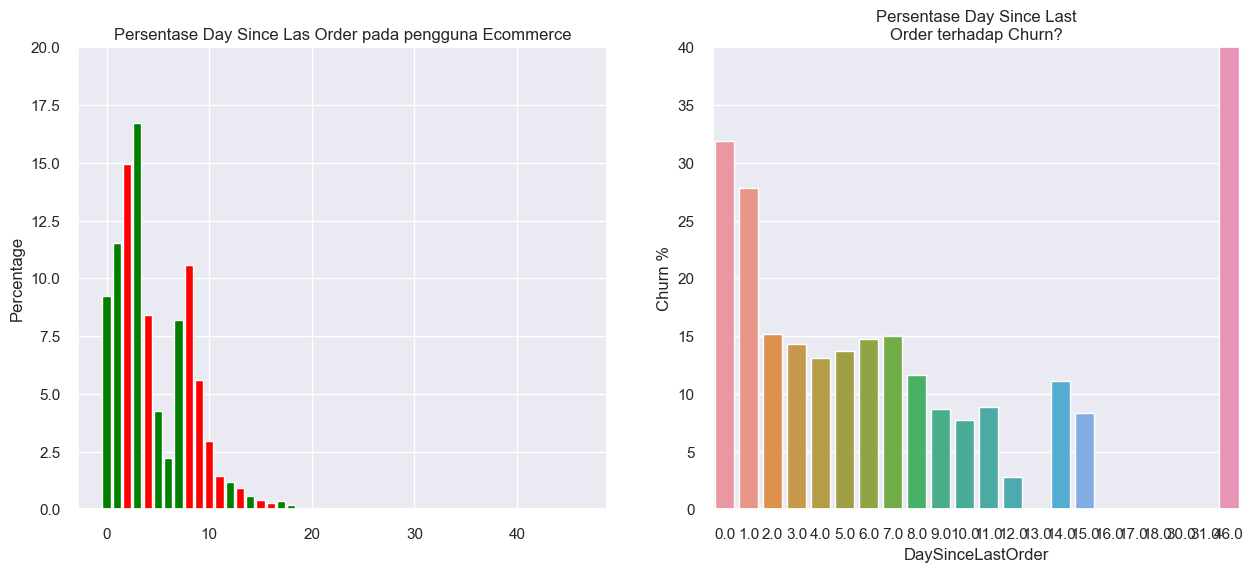

In [100]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Day Since Last Order
data = df["DaySinceLastOrder"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Persentase Day Since Las Order pada pengguna Ecommerce')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

# Chances of churn based on Day Since Last Order
sns.barplot(x="DaySinceLastOrder", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('Persentase Day Since Last Order terhadap Churn?', 30)))
axes2.set_ylim(0,40)

plt.show()

pada Grafik diatas bisa dijelaskan bahwa :  
-Paling banyak pengguna tidak melakukan pemesanan adalah selama 3 hari (~16%)  
-Semakin lama pengguna tidak melakukan pemesanan semakin sedikit jumlah pengguna  
-Semakin lama pengguna tidak melakukan pemesanan maka tingkat Churn semakin rendah  


#### Check Berdasarkan Cashback Amount

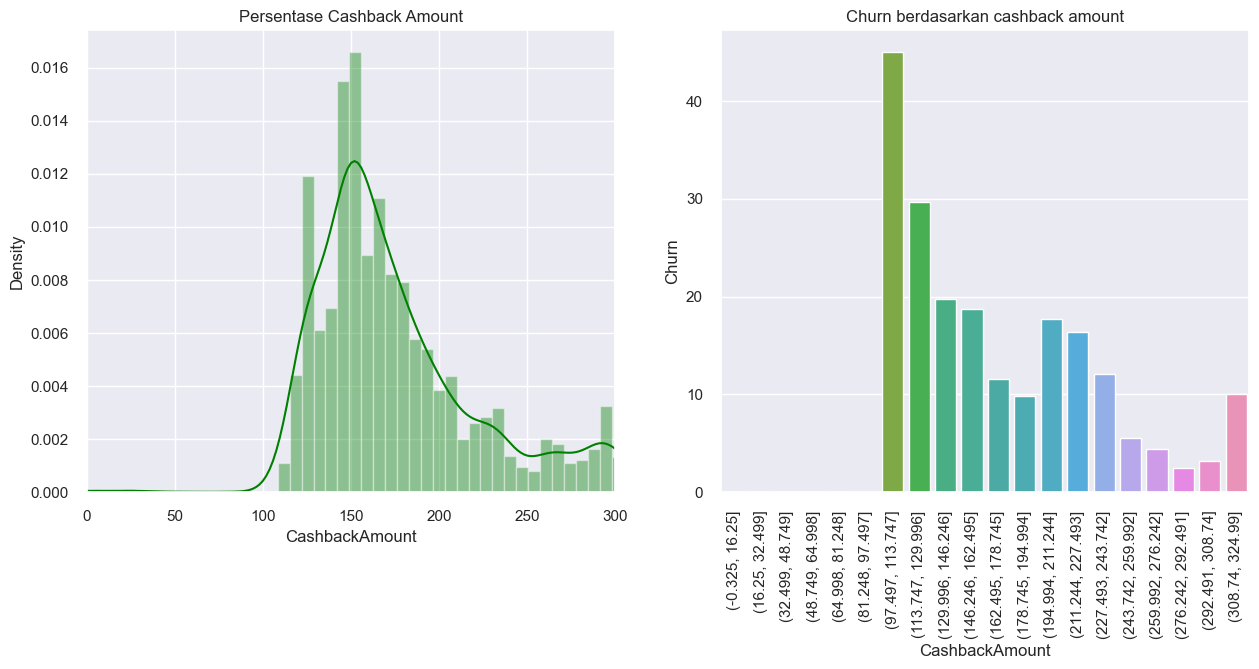

In [101]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot Cashback Amount occurance
sns.distplot(df.CashbackAmount, color='green', ax=axes1)
axes1.set_title('Persentase Cashback Amount')
axes1.set_xlim(0,300)

# Categorize Cashback Amount into bins and plot
cashbackamount = pd.cut(df["CashbackAmount"], bins=20)
sns.barplot(x=cashbackamount, y=df.Churn*100, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn berdasarkan cashback amount')

plt.show()

Pada grafik diatas bisa di jelaskan :
- Cashback paling banyak sebesar 150 dollar
- semakin tinggi cashback yang di berikan semakin rendah persentase Churn 

## Data Preprocessing dan Feature Engineering

In [102]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Dataset Splitting
1. Disini kita akan menggunakan churn sebagai variabel target(y) dan sisanya sebagai variabel fitur(X)
2. Kita akan gunakan random state 42, rasio splitting training dan testing 80:20.
3. Dalam kasus klasifikasi ini, kita melakukan stratify untuk variabel target(y)

In [103]:
# Dataset Splitting
X = df.drop(columns=['Churn'])
y = df.Churn



In [104]:
# Melakukan data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2615, 10), (654, 10), (2615,), (654,))

#### Handling Missing Values

In [105]:
def imputation(X_train, X_test, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(X_train[cont_features])
    X_train[cont_features] = imputerCont.transform(X_train[cont_features])
    X_test[cont_features] = imputerCont.transform(X_test[cont_features])
    return X_train, X_test

Data train dan data test dilakukan imputasi missing value dengan fungsi yang sudah dibuat.

In [106]:
# Fit&transform missing value imputation
x_train , x_test = imputation(X_train, X_test,kontinu)

In [107]:
# Melihat missing value
print(X_test.isna().sum(), X_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
dtype: int64


Sudah tidak ada missing value pada data.

## Transformer

In [108]:
# Preprocessing

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first'),['MaritalStatus']),
    ('Binary', BinaryEncoder(), ['PreferedOrderCat']),
    ('scaler', StandardScaler(), ['Tenure','WarehouseToHome','NumberofAddress','DaySinceLastOrder','CashbackAmount'])
], remainder='passthrough')

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler()) 
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ["Tenure", "WarehouseToHome", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "DaySinceLastOrder", "CashbackAmount"]),
    ('categoric', categorical_pipeline, ["PreferedOrderCat", "MaritalStatus", "Complain"]),
])

## Modeling
Adapun beberapa metode klasifikasi yang akan diuji coba sebagai penentuan model terbaik untuk dataset ini, antara lain Logistic Regression, KNearest Neighbour, Random Forest, Xgboost dan SVM.

jcompl.tuning adalah library yang di kembangkan oleh orang indonesia bernama Wira Dharma Kencana Putra, nntuk menjadi salah satu referensi saya untuk hyperparameter tuning

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve


## Benchmark Models

In [110]:
xgb = XGBClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
logreg = LogisticRegression()

In [111]:
list_algo = [xgb, knn, svc, rf,logreg]
list_score = []
list_mean = []
list_std = []

for model in list_algo:
    
    # pipeline berisi preprocessing dan modeling
    pipe_model = Pipeline([
        ('preprocessing', preprocessor),
        ('modeling', model)
    ])

    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring='f1' # f1
    )

    list_score.append(cv_score.round(1))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

df_cv = pd.DataFrame({
    'algo': [str(x) for x in list_algo],
    'f1 mean': list_mean,
    'std': list_std,
    'all_score': list_score
})

df_cv

,algo,f1 mean,std,all_score
0,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=None, ...)",0.701714,0.043389,"[0.6, 0.8, 0.7, 0.7, 0.7]"
1,KNeighborsClassifier(),0.502414,0.056822,"[0.5, 0.5, 0.4, 0.5, 0.5]"
2,SVC(),0.390815,0.017373,"[0.4, 0.4, 0.4, 0.4, 0.4]"
3,RandomForestClassifier(),0.676946,0.038538,"[0.7, 0.7, 0.6, 0.7, 0.6]"
4,LogisticRegression(),0.486685,0.012107,"[0.5, 0.5, 0.5, 0.5, 0.5]"


di proses ini kita akan memilih model model yang terbaik berdasarkan parameter default atau benchmark model. bisa dilihat bahwa model XGBoost dan Random Forest Classifier memberi hasil cukup baik. dengan nilai XGBoost 0.701 dan Random Forest Classifier 0.67.

### Hyperparameter Tuning

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model KNN, SVM, Logistic Regression, Random forest dan XGBoost, dengan harapan model lebih optimal.

In [112]:
gsp.xgb_params

{'algo__max_depth': [3, 6, 10],
 'algo__colsample_bytree': [0.4, 0.6, 0.8],
 'algo__n_estimators': [100, 150, 200],
 'algo__subsample': [0.4, 0.6, 0.8],
 'algo__gamma': [1, 5, 10],
 'algo__learning_rate': [0.01, 0.1, 1],
 'algo__reg_alpha': [0.01, 0.1, 10],
 'algo__reg_lambda': [0.01, 0.1, 10]}

In [113]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [114]:
gsp.logreg_params


{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [115]:
gsp.knn_params

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [116]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [117]:
# imbalance
from imblearn.pipeline import Pipeline

ROS = RandomUnderSampler()
RUS = RandomOverSampler()
SMOT = SMOTE()
NM = NearMiss()

### KNN

In [118]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('imba', SMOT),
    ('algo', KNeighborsClassifier())
])

modelKNN = GridSearchCV(pipeline, gsp.knn_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
modelKNN.fit(X_train, y_train)

print(modelKNN.best_params_)
print(modelKNN.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__weights': 'distance'}
0.5646056073194203


Dari hasil score model disini bisa dilihat antara score dari train dan test nya kurang baik dan overfitting

### SVM

In [119]:

pipeline = Pipeline([
    ('prep', preprocessor),
    ('imba', SMOT),
    ('algo', SVC(max_iter=500))
])

modelSVM = GridSearchCV(pipeline, gsp.svm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
modelSVM.fit(X_train, y_train)

print(modelSVM.best_params_)
print(modelSVM.best_score_)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 10.0, 'algo__gamma': 1.0}
0.5818926802057333


Dari hasil score model disini bisa dilihat antara score dari train dan test sangat overfitting

### Random Forest

In [120]:

pipeline = Pipeline([
    ('prep', preprocessor),
    ('imba', SMOT),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

modelRF = GridSearchCV(pipeline, gsp.rf_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
modelRF.fit(X_train, y_train)

print(modelRF.best_params_)
print(modelRF.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
0.6897814666406489


dari hasil score model disini bisa dilihat score dari train dan testnya cukup baik tapu masih cukup overfitting

### Logistic Regression

In [121]:

pipeline = Pipeline([
    ('prep', preprocessor),
    ('imba', SMOT),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

modelLogReg = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1, scoring='f1')
modelLogReg.fit(X_train, y_train)

print(modelLogReg.best_params_)
print(modelLogReg.best_score_)

Fitting 4 folds for each of 14 candidates, totalling 56 fits
{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.5537291660233505


Dari hasil score model disini bisa dilihat antara score dari train dan test sangat overfitting

### Xgboost Classifier

In [122]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('imba', SMOT),
    ('algo', XGBClassifier())
])

modelXGB = GridSearchCV(pipeline, gsp.xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
modelXGB.fit(X_train, y_train)

print(modelXGB.best_params_)
print(modelXGB.best_score_)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
{'algo__colsample_bytree': 0.8, 'algo__gamma': 1, 'algo__learning_rate': 0.1, 'algo__max_depth': 10, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.8}
0.7024177063787512


In [123]:
score= [modelLogReg, modelRF, modelSVM, modelKNN, modelXGB]
score_mean = []
for i in score:
    score_mean.append(i.best_score_)

pd.DataFrame({'model':['modelLogReg.best_score_', 'modelRF.best_score_', 'modelSVM.best_score_', 'modelKNN.best_score_','modelXGB.best_score_'],
             'f1_score':score_mean}).set_index('model').sort_values(by='f1_score',ascending=False)

,f1_score
model,
modelXGB.best_score_,0.702418
modelRF.best_score_,0.689781
modelSVM.best_score_,0.581893
modelKNN.best_score_,0.564606
modelLogReg.best_score_,0.553729


pada hasil diatas dapat dilihat bahwa model terbaik dengan hyperparameter adalah XGBoost dan Random Forest dengan nilai rata rata F1 Score masing masing 0.70 dan 0.69. Nilai ini cukup tinggi sehingga akan coba di implementasi pada prediction dan Evaluation

## Prediction and Evaluation  

In [124]:
final_model = modelXGB.best_estimator_
y_pred = final_model.predict(X_test)
report_final = classification_report(y_test, y_pred)
print('Clssification Report XGBoost :\n', report_final)

Clssification Report XGBoost :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       547
           1       0.76      0.85      0.81       107

    accuracy                           0.93       654
   macro avg       0.87      0.90      0.88       654
weighted avg       0.94      0.93      0.93       654



Dari hasil tersebut, dapat dilihat bahwa model memiliki akurasi sebesar 0.95 pada data uji, dengan presisi sebesar 0.96 untuk kelas 0 dan 0.75 untuk kelas 1. Recall sebesar 0.95 untuk kelas 0 dan 0.79 untuk kelas 1. F1-score sebesar 0.95 untuk kelas 0 dan 0.77 untuk kelas 1.

### Feature Importance

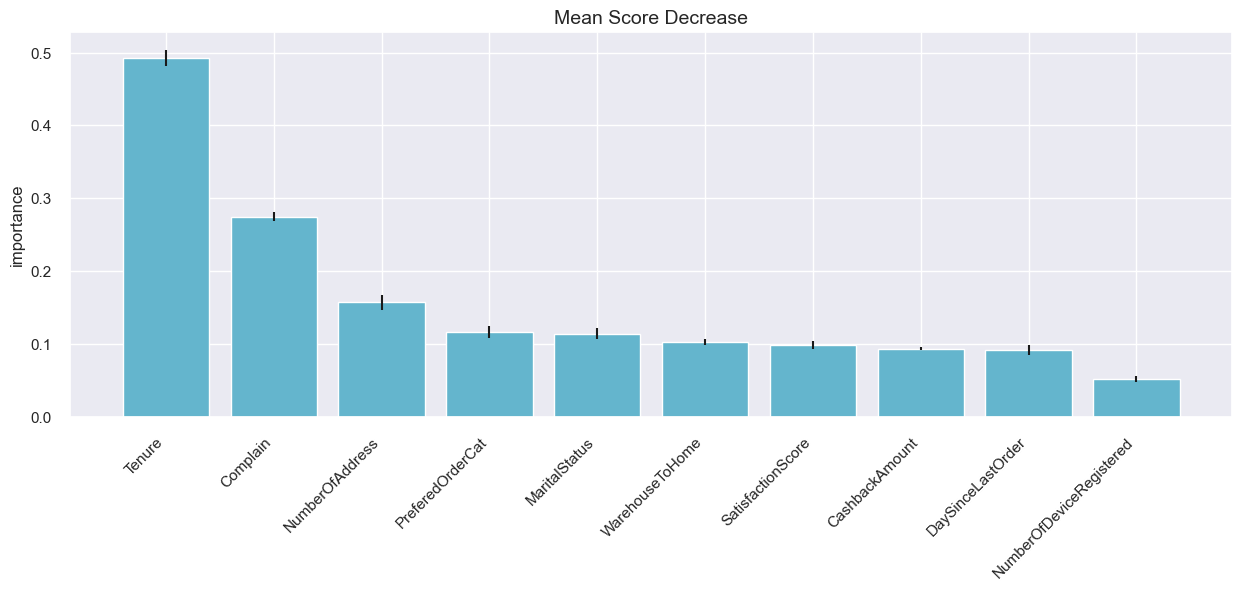

In [125]:
# Feature Importance
df_imp = mean_score_decrease(X_train, y_train, modelRF, plot=True)

Dari data diatas dapat dilihat faktor mana yang mempengaruhi potensi pelanggan churn dan model machine learning. Fitur yang paling penting adalah Tenure, selanjutnya adalah masa complain pelanggan, dan NumberOfAddress. Analisa dapat ditingkatkan dengan melakukan feature selection atau kombinasi dari fitur-fitur yang berpengaruh untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik yang sekarang. 

Selain itu faktor-faktor tersebut juga bisa menjadi insight untuk bisnis, Pelanggan yang telah menggunakan layanan dalam waktu yang lama (dengan tenure tinggi) cenderung lebih stabil dan kurang cenderung untuk berhenti berlangganan dan selanjutnya perusahaan harus menerima feedback dari pelanggan yang melakukan complain dan menindak-lanjuti complain tersebut, baik itu dari platform e-commerce maupun marketplace yang terdaftar diplatform. Selain itu perusahaan dapat meningkatkan retensi pelanggan dengan memberi promo-promo menarik yang berkelanjutan, seperti apabila adanya subscription. 

### Model Akhir

Export model terbaik dengan pickle format .sav

In [126]:
# Export model
best_model = modelXGB.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

## Conclusion and Recommendation

### Kesimpulan

In [127]:
print('Classification Report Tuned XGBoost : \n', report_final)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       547
           1       0.76      0.85      0.81       107

    accuracy                           0.93       654
   macro avg       0.87      0.90      0.88       654
weighted avg       0.94      0.93      0.93       654



Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model yang sudah dibuat, model dapat mengetahui 95% dari pelanggan yang tidak churn dan 79% pelanggan yang churn berdasarkan recall. selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 75%. Maka masih ada pelanggan yang churn dan di prediksi sebagai tidak churn sebesar 4%.

sebagai contoh biaya mempertahankan pelanggan sebesar 10$ dan biaya mendapatkan pelanggan baru 30$, dan terdapat 3269 pelanggan dimana pelanggan yang churn sebesar 533 orang dan yang tidak churn sebesar 2736 orang, maka kurang lebih pertanyaanya adalah sebagai berikut :

Tanpa Model( semua pelanggan di berikan penawaran):
- Total Biaya => 3269 * 10 = 32.690 USD
- Total pelanggan churn yang ditemukan => 533 orang
- Total pelanggan churn yang tidak ditemukan => 0 orang
- Total pelanggan tidak churn yang ditemukan => 2736 orang
- Total pelanggan tidak churn yang tidak ditemukan => 0 orang
- Biaya yang terbuang => 2736 x 10 = 27.360 USD

*Dengan Model* (Penawaran diberikan sesuai prediksi):
- Total Biaya => (533 x 0.70) x 10= 3.731 USD
- Total pelanggan churn yang ditemukan => (533x0.7)= 374 orang
- Total pelanggan churn yang tidak ditemukan => 533-374 = 159 + (2736 x 0.04) = 268 orang
- Total pelanggan tidak churn yang ditemukan => (2736 x 0.95)= 2599 orang
- Total pelanggan tidak churn yang tidak ditemukan => 2736 - 2599 = 137 orang
- Biaya yang terbuang => (137x 10USD) + (268 X 30USD) = 1.370 + 8.040 = 9040 USD
- Jumlah penghematan => 27.310 - 9.410 = 17.950 $ 

perbandingan penawaran yang di berikan tanpa model yaitu *27.360* U$ di bandingkan dengan Model sesuai prediksi yaitu *12.800* U$ dengan menghemat sebesar *17.950* U$ 

Dengan adanya bantuan model, perusahan e-commerce dapat menghemat biaya yang cukup besar dengan melakukan pemasaran yang lebih tepat sasaran.

Selain itu, berdasarkan analisa faktor yang berpengaruh dengan customer churn adalah complain dan masa tenure pelanggan. Hal tersebut harus diperhatikan, apabila pelanggan melakukan complain dan semakin kecil masa tenure pelanggan, ada potensi customer churn. 

### Rekomendasi

Adapun beberapa rekomendasi yang dapat diberikan terkait sisi bisnis dan model:  
  
* Business:
    - Memberikan penawaran pada pelanggan dengan masa tenure 0-2 bulan yang berpotensi churn, berupa promo, cashback, atau subscription sehingga pelanggan lebih tertarik untuk menggunakan platform e-commerce terus-menerus
    - Memperhatikan complain yang diberikan pelanggan, baik itu dari segi kemudahan penggunaan platform e-commerce, memperbanyak variasi produk dengan mencari mitra, mengoptimalkan live chat antar pelanggan-pembeli dan pelanggan-support centre, memonitor dan memberi pelatihan kepada marketplace yang terdaftar sehingga memberikan service dan produk yang memuaskan. 
    - Memberikan penawaran pemotongan ongkos kirim pada potensi customer churn yang memiliki jarak antar warehouse dan rumah yang jauh
    - Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran     
    
     
* Model:
    - Saat penarikan data, data diharapkan memiliki kolom customer ID untuk memastikan tidak adanya data yang duplikat, serta memastikan data yang didapat tidak ada missing value
    - Adanya kolom dengan fitur lain yang berhubungan langsung dengan servis yang perusahaan e-commerce berikan dan transaksi pelanggan, seperti berapa lama pengiriman produk, ketepatan waktu pengiriman, kolom customer service helpful atau tidak, dan sebagainya
    - Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi, atau menambahkan parameter lain
    - Meningkatkan nilai recall dengan tuning threshold F1 Score
    - Memilah fitur sesuai dengan feature importances dan melakukan trial kombinasi fitur yang berpengaruh untuk mengurangi kompleksitas model

Dengan adanya rekomendasi diatas, diharapkan perusahaan e-commerce dapat menurunkan biaya marketing dan diharapkan dapat meningkatkan profit dengan adanya pelanggan loyal.